The data frame has 569 rows and 33 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-nul

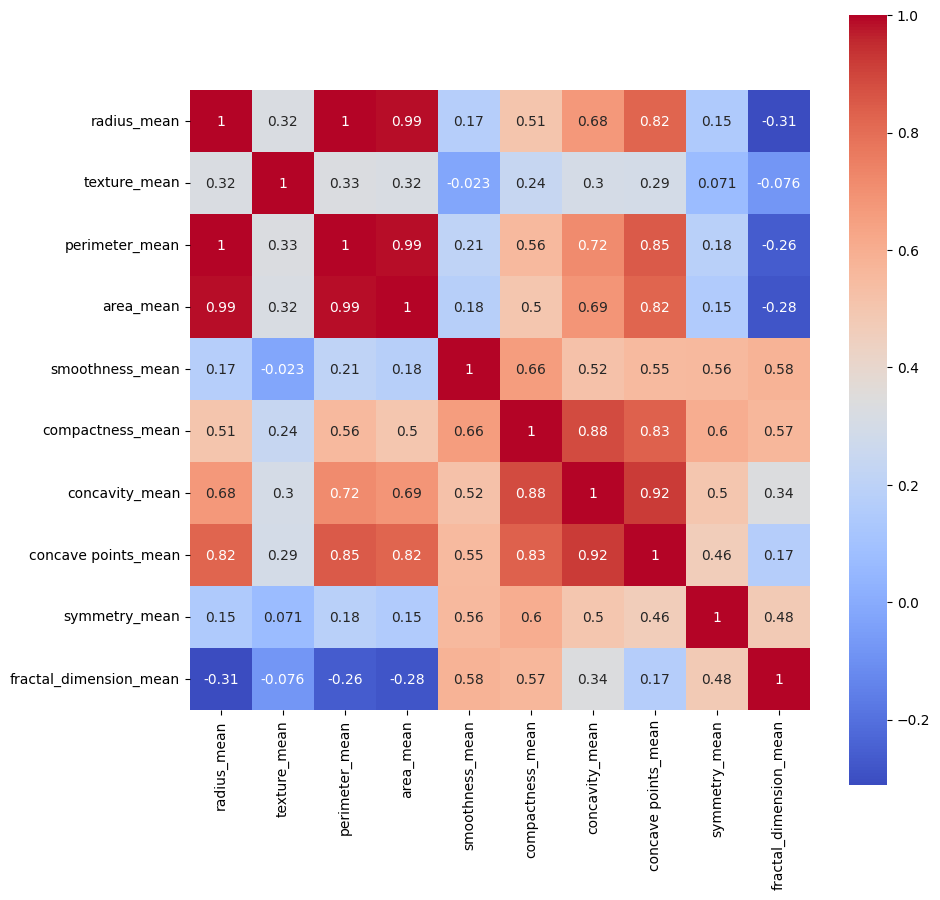

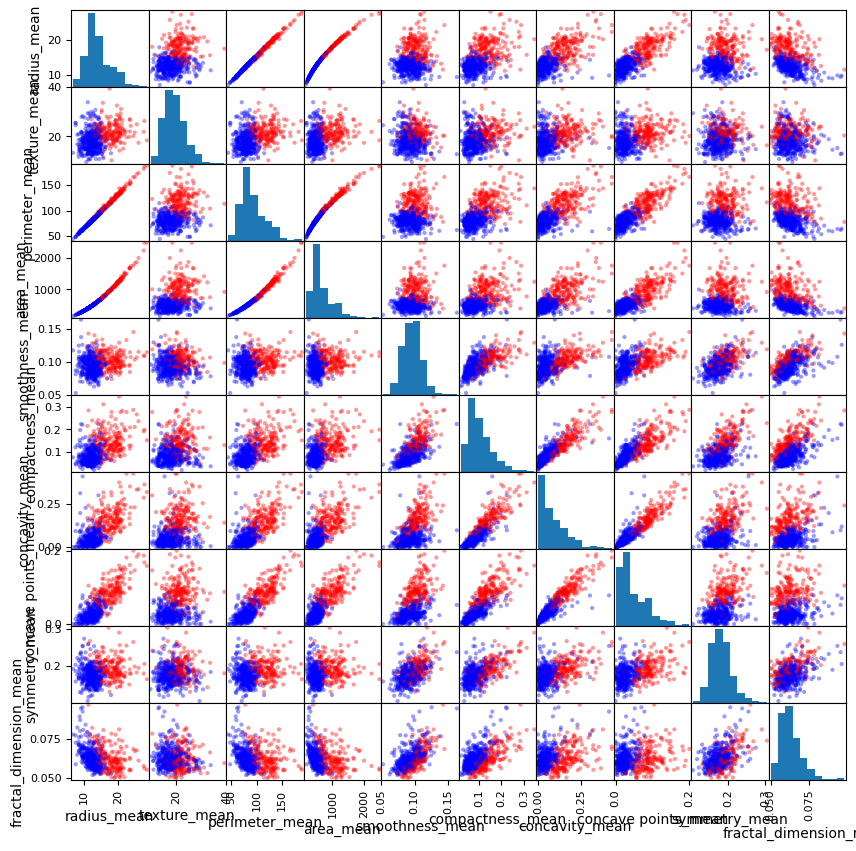

<ipython-input-3-343ef4c4a9b1>:42: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(csv_data[csv_data['diagnosis'] == 'M'][feature], bins=bins, color='red', label='M')
<ipython-input-3-343ef4c4a9b1>:43: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(csv_data[csv_data['diagnosis'] == 'B'][feature], b

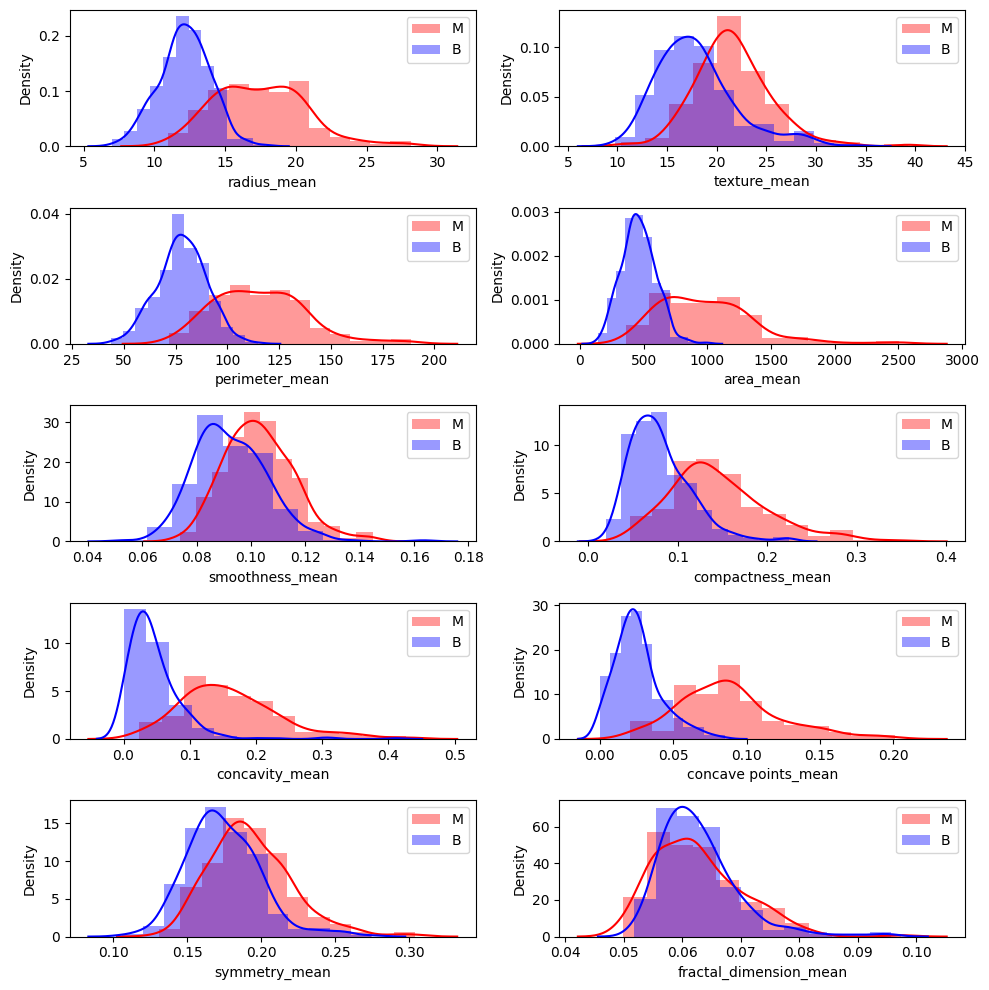

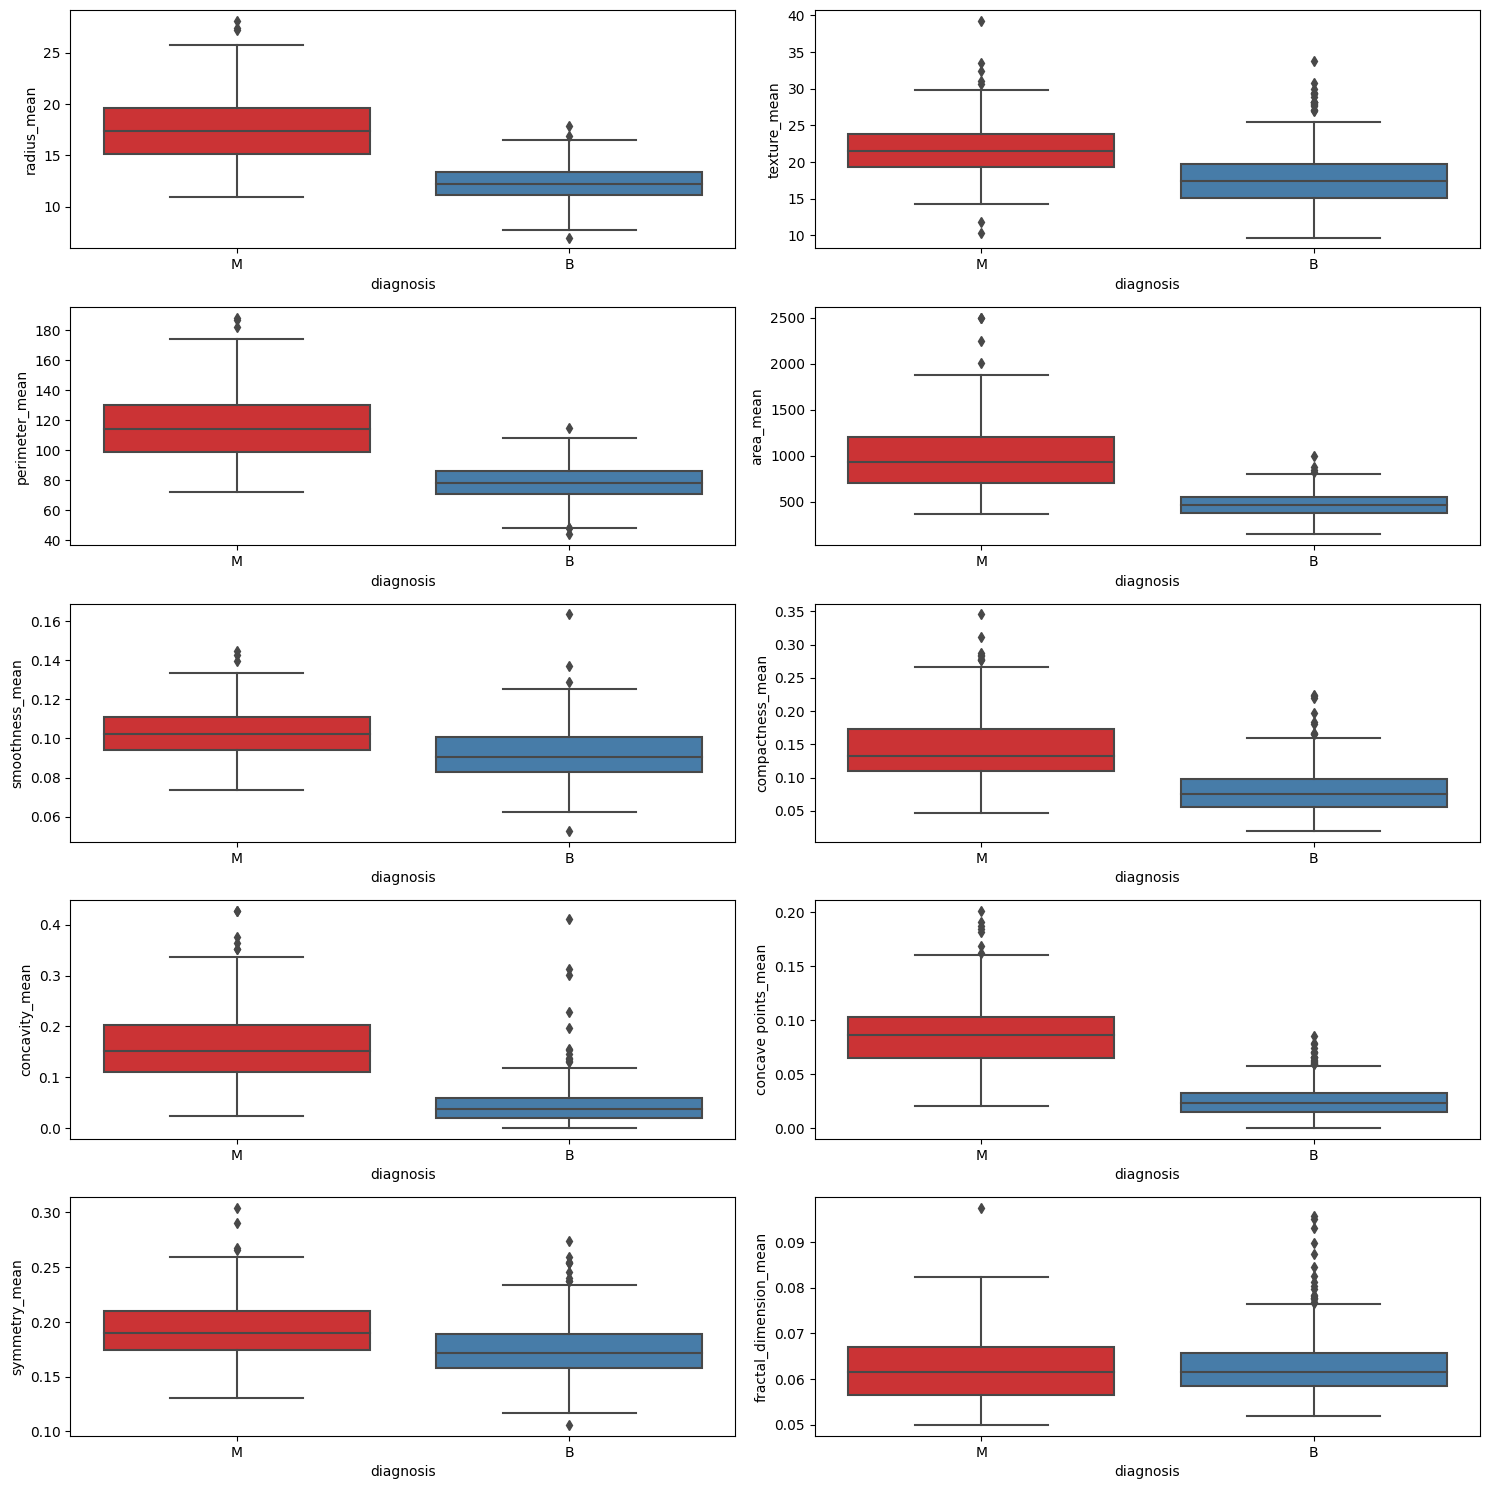

SVC Accuracy: 92.11%
SVC Cross validation score: 88.23% (+/- 10.15%)
NuSVC Accuracy: 92.11%
NuSVC Cross validation score: 85.60% (+/- 8.39%)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

LinearSVC Accuracy: 79.82%
LinearSVC Cross validation score: 84.71% (+/- 11.35%)
Random Forest Accuracy: 95.61%
Radnom Forest Cross validation score: 93.85% (+/- 8.62%)
------------------Results after feature selection-------------
SVC Accuracy: 92.11%
SVC Cross validation score: 88.41% (+/- 10.53%)
NuSVC Accuracy: 92.11%
NuSVC Cross validation score: 85.60% (+/- 8.39%)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

LinearSVC Accuracy: 81.58%
LinearSVC Cross validation score: 74.36% (+/- 19.99%)
Random Forest Accuracy: 93.86%
Random Forest Cross validation score: 91.92% (+/- 10.77%)
              accuracy_all_features  accuracy_selected_features  \
SVC                        0.921053                    0.921053   
NuSVC                      0.921053                    0.921053   
LinearSVC                  0.798246                    0.815789   
RandomForest               0.956140                    0.938596   

              accuracy_diff  cv_all_features  cv_selected_features   cv_diff  
SVC                0.000000         0.882331              0.884085  0.001754  
NuSVC              0.000000         0.855952              0.855952  0.000000  
LinearSVC          0.017544         0.847055              0.743578 -0.103477  
RandomForest      -0.017544         0.938534              0.919236 -0.019298  


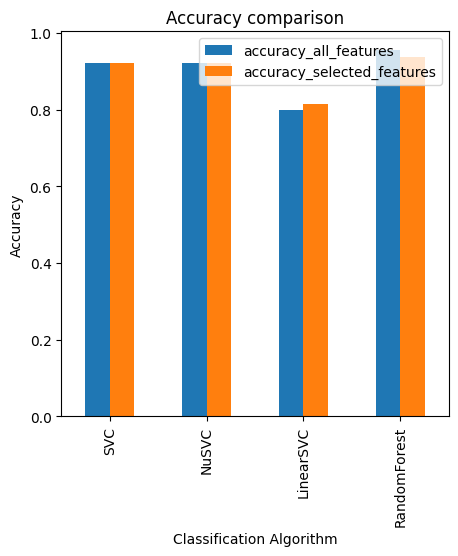

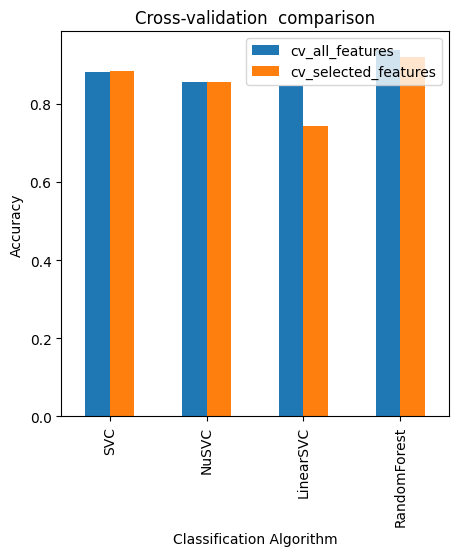

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

csv_data = pd.read_csv('breastCancer.csv')

print('The data frame has', csv_data.shape[0], 'rows and', csv_data.shape[1], 'columns.')
csv_data.info()
print(csv_data.head(5))

csv_data.drop(csv_data.columns[[-1, 0]], axis=1, inplace=True)

diagnosisAll = list(csv_data.shape)[0]
diagnosisCategories = list(csv_data['diagnosis'].value_counts())
print('The data has', diagnosisAll, 'diagnosis,', diagnosisCategories[0], 'malignant and', diagnosisCategories[1], 'benign.')

featuresMean = list(csv_data.columns[1:11])

######### Correlation plot #############

plt.figure(figsize=(10, 10))
sns.heatmap(csv_data[featuresMean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()


colorSet = {'M':'red', 'B':'blue'}
colors = csv_data['diagnosis'].map(lambda x: colorSet.get(x))
sm = pd.plotting.scatter_matrix(csv_data[featuresMean], c=colors, alpha=0.4, figsize=((10, 10)))
plt.show()


bins = 12
plt.figure(figsize=(10, 10))
for i, feature in enumerate(featuresMean):
    rows = int(len(featuresMean) / 2)
    plt.subplot(rows, 2, i + 1)
    sns.distplot(csv_data[csv_data['diagnosis'] == 'M'][feature], bins=bins, color='red', label='M')
    sns.distplot(csv_data[csv_data['diagnosis'] == 'B'][feature], bins=bins, color='blue', label='B')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

################ Box-Plot #############

plt.figure(figsize=(15, 15))
for i, feature in enumerate(featuresMean):
    rows = int(len(featuresMean) / 2)
    plt.subplot(rows, 2, i + 1)
    sns.boxplot(x='diagnosis', y=feature, data=csv_data, palette="Set1")
plt.tight_layout()
plt.show()


########## Selected features #################

selectedFeatures = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']


setDiagnosis = {'M':1, 'B':0}
csv_data['diagnosis'] = csv_data['diagnosis'].map(setDiagnosis)

X = csv_data.loc[:,featuresMean]
y = csv_data.loc[:, 'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
accuracy_all_features = []
cv_all_features = []


################## Support Vector Machine #######################

clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=10)
accuracy_all_features.append(accuracy_score(prediction, y_test))
cv_all_features.append(np.mean(scores))
print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("SVC Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))


clf = NuSVC()
clf.fit(X_train, y_train)
prediciton = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=10)
accuracy_all_features.append(accuracy_score(prediction, y_test))
cv_all_features.append(np.mean(scores))
print("NuSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("NuSVC Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))


clf = LinearSVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=10)
accuracy_all_features.append(accuracy_score(prediction, y_test))
cv_all_features.append(np.mean(scores))
print("LinearSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("LinearSVC Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))


#################### Random Forest ####################################

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=10)
accuracy_all_features.append(accuracy_score(prediction, y_test))
cv_all_features.append(np.mean(scores))
print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Radnom Forest Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))


#################### Using Selected Features #########################


X = csv_data.loc[:,selectedFeatures]
y = csv_data.loc[:, 'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
accuracy_selected_features = []
cv_selected_features = []

print('------------------Results after feature selection-------------')

################## Support Vector Machine #######################

clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=10)
accuracy_selected_features.append(accuracy_score(prediction, y_test))
cv_selected_features.append(np.mean(scores))
print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("SVC Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))


clf = NuSVC()
clf.fit(X_train, y_train)
prediciton = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=10)
accuracy_selected_features.append(accuracy_score(prediction, y_test))
cv_selected_features.append(np.mean(scores))
print("NuSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("NuSVC Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))


clf = LinearSVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=10)
accuracy_selected_features.append(accuracy_score(prediction, y_test))
cv_selected_features.append(np.mean(scores))
print("LinearSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("LinearSVC Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))


#################### Random Forest ####################################


clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=10)
accuracy_selected_features.append(accuracy_score(prediction, y_test))
cv_selected_features.append(np.mean(scores))
print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Random Forest Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))


accuracy_diff = list(np.array(accuracy_selected_features) - np.array(accuracy_all_features))
cv_diff = list(np.array(cv_selected_features) - np.array(cv_all_features))
d = {'accuracy_all_features':accuracy_all_features, 'accuracy_selected_features':accuracy_selected_features, 'accuracy_diff':accuracy_diff,
     'cv_all_features':cv_all_features, 'cv_selected_features':cv_selected_features, 'cv_diff':cv_diff}
indexList = ['SVC', 'NuSVC', 'LinearSVC', 'RandomForest']
df = pd.DataFrame(d, index=indexList)
print(df)

#################### accuracy comparison graph ######################

ax = df[['accuracy_all_features', 'accuracy_selected_features']].plot(kind='bar', title = "Accuracy comparison", figsize=(5, 5), legend=True, fontsize=10)
ax.set_xlabel("Classification Algorithm", fontsize=10)
ax.set_ylabel("Accuracy", fontsize=10)
plt.show()


ax = df[['cv_all_features', 'cv_selected_features']].plot(kind='bar', title = "Cross-validation  comparison", figsize=(5, 5), legend=True, fontsize=10)
ax.set_xlabel("Classification Algorithm", fontsize=10)
ax.set_ylabel("Accuracy", fontsize=10)
plt.show()